# **Problem Statement**

Financial institutions are exposed to substantial risks from loan defaults, impacting their profitability and stability. Accurate prediction of the probability of default (PD) on loans is essential for effective risk management and strategic planning. This project aims to develop a robust predictive model that estimates the PD using historical loan data.

The model will leverage various borrower and loan-specific features, including loan amount, outstanding balance, salary, number of past defaults, age, location, marital status, gender, interest rate, and remaining loan term. By analyzing these factors, the model will identify key predictors of default and provide actionable insights.

The objectives of this project include:

- **Enhancing Risk Assessment:** Improving the accuracy of PD predictions to enable better risk evaluation and loan approval processes.
- **Optimizing Resource Allocation:** Allocating resources more effectively by identifying high-risk loans and focusing on mitigation strategies.
- **Improving Customer Segmentation:** Tailoring financial products and services to different customer segments based on their risk profiles.
- **Ensuring Regulatory Compliance:** Addressing potential biases in predictions to comply with fair lending practices and regulations.

This project will employ advanced statistical and machine learning techniques to build the PD model, ensuring it is both accurate and interpretable. By achieving these goals, financial institutions can reduce the impact of loan defaults, enhance their financial stability, and improve overall customer satisfaction.

The project will cover the following aspects:

### 1. Data Cleaning:
- Cleaning the dataset 
### 2. Basic EDA (Exploratory Data Analysis):
- Exploring the dataset to gain insights into feature distributions, correlations, and potential patterns.
- Visualizing key relationships and summarizing my findings.
- Discussing any interesting observations.
### 3. Feature Selection:
- Selecting relevant features for model training.
- Justifing my feature selection methods (e.g., statistical tests, domain knowledge).
### 4. Hyperparameter Tuning:
- Optimizing hyperparameters for your chosen machine learning model(s).
- Explaining the rationale behind your choices.
### 5. Cross Validation:
- Implementing cross-validation to assess model performance.
- Describing the cross-validation strategy.
- Reporting evaluation metrics.
### 6. Feature Scaling and Transformation:
- Applying appropriate scaling and transformation techniques.
- Discussing why l chose specific transformations.
### 7. Model Building:
- Train at least 5 models.
- Explain your choice of algorithm.
- Discuss any model assumptions and limitations.
### 8. Model Evaluation:
- Evaluating your model(s) on a separate validation set.
- Interpreting performance metrics.

In [1]:
# Importing necessary modules

# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Filtering warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,...,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


In [3]:
# Printing the shape (rows and columns of the dataset)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 100000 rows and 21 columns.


In [4]:
# Finding the column names
df.columns

Index(['Unnamed: 0', 'loan_id', 'gender', 'disbursemet_date', 'currency',
       'country', 'sex', 'is_employed', 'job', 'location', 'loan_amount',
       'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age',
       'number_of_defaults.1', 'remaining term', 'salary', 'marital_status',
       'age.1', 'Loan Status'],
      dtype='object')

In [5]:
# Information summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  float64
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n

In [6]:
#Now dropping duplicated and irrelavant columns (features) from our dataset 

df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['disbursemet_date'], inplace=True)
df.drop(columns=['loan_id'], inplace=True)
df.drop(columns=['age.1'], inplace=True)
df.drop(columns=['number_of_defaults.1'], inplace=True)
df.drop(columns=['sex'], inplace=True)


In [7]:
# Statistical summary of the data
df.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,salary
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,2781.804324
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,696.450055
min,1000.000000,0.000000,0.000000,0.100000,21.00000,250.000000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,2273.929349
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,2665.441567
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,3146.577655
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,10000.000000


# Data Cleaning

In [8]:
# It seems out dataset has leading and trailing whitespace from each string in the column.
# Here we are removing these leading and trailing spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
#Checking for null values in the data
df.isna().sum()

gender                    0
currency                  0
country                 100
is_employed               0
job                    4136
location                595
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
remaining term            0
salary                    0
marital_status            0
Loan Status               0
dtype: int64

There are missing values in job and location features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median

- For categorical variables: imputation using mode

In [10]:
# Checking for the null values percentage in columns 
missing_values= df['country'].isnull().sum()
missing_value_percentage = missing_values /len(df) *100
print("The percentage for missing values in country column is :" , float(f" {missing_value_percentage:.1f}") )
print("************************************************************")

missing_values= df['job'].isnull().sum()
missing_value_percentage = missing_values /len(df) *100
print("The percentage for missing values in job column is :" , float(f" {missing_value_percentage:.1f}") )
print("************************************************************")

missing_values= df['location'].isnull().sum()
missing_value_percentage = missing_values /len(df) *100
print("The percentage for missing values in location column is :" ,float(f" {missing_value_percentage:.1f}"))
print("************************************************************")

The percentage for missing values in country column is : 0.1
************************************************************
The percentage for missing values in job column is : 4.1
************************************************************
The percentage for missing values in location column is : 0.6
************************************************************


There are very less missing values in job (4.1%), location (0.6%) and country(0.1%) features. So we can fill the job feature using the 'Unmeployed' value as we can see in the is_employed feature that if the value is false then we got a null value in the job feature, hence using 'Unmeployed' value. For both the location and country feature we will use the mode of the values. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [11]:
# Now filling the null values 
df['job'].fillna("Unemployed",inplace=True)
df['location'].fillna("Harare", inplace=True)
df['country'].fillna("Zimbabwe", inplace=True)
df.isna().sum()

gender                 0
currency               0
country                0
is_employed            0
job                    0
location               0
loan_amount            0
number_of_defaults     0
outstanding_balance    0
interest_rate          0
age                    0
remaining term         0
salary                 0
marital_status         0
Loan Status            0
dtype: int64

In [12]:
# Checking for any duplicated values
df.duplicated().sum()

0

 Now that we have cleaned our data,we are ready to proceed to the next step: Exploratory Data Analysis (EDA).

# EDA (Exploratory Data Analysis)

## Univariant Analysis

Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

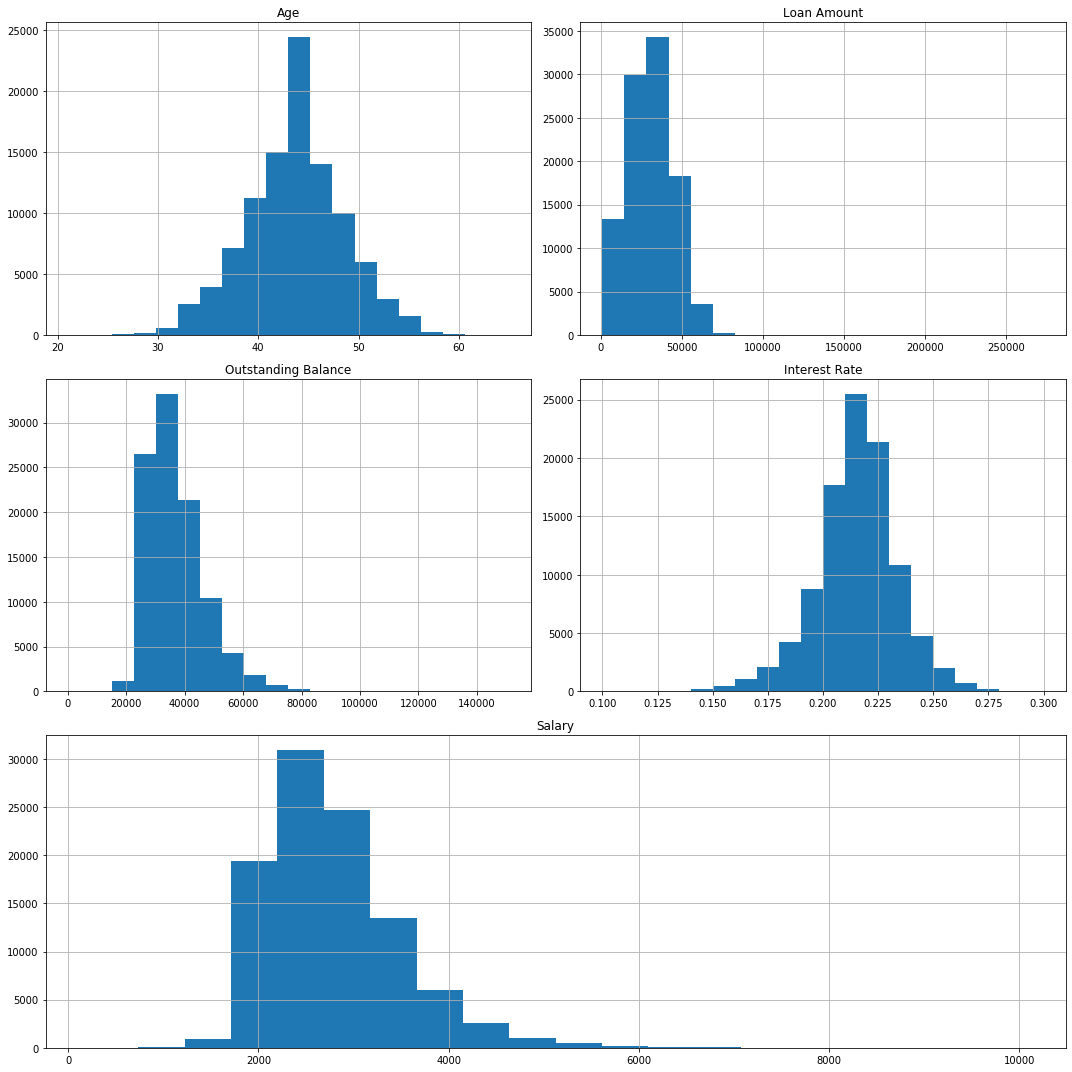

In [13]:
fig = plt.figure(figsize=(15, 15))

ax1 = plt.subplot2grid((3, 2), (0, 0))
df['age'].hist(bins=20, ax=ax1)
ax1.set_title("Age")

ax2 = plt.subplot2grid((3, 2), (0, 1))
df['loan_amount'].hist(bins=20, ax=ax2)
ax2.set_title("Loan Amount")

ax3 = plt.subplot2grid((3, 2), (1, 0))
df['outstanding_balance'].hist(bins=20, ax=ax3)
ax3.set_title("Outstanding Balance")

ax4 = plt.subplot2grid((3, 2), (1, 1))
df['interest_rate'].hist(bins=20, ax=ax4)
ax4.set_title("Interest Rate")

ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
df['salary'].hist(bins=20, ax=ax5)
ax5.set_title("Salary")

plt.tight_layout()
plt.show()

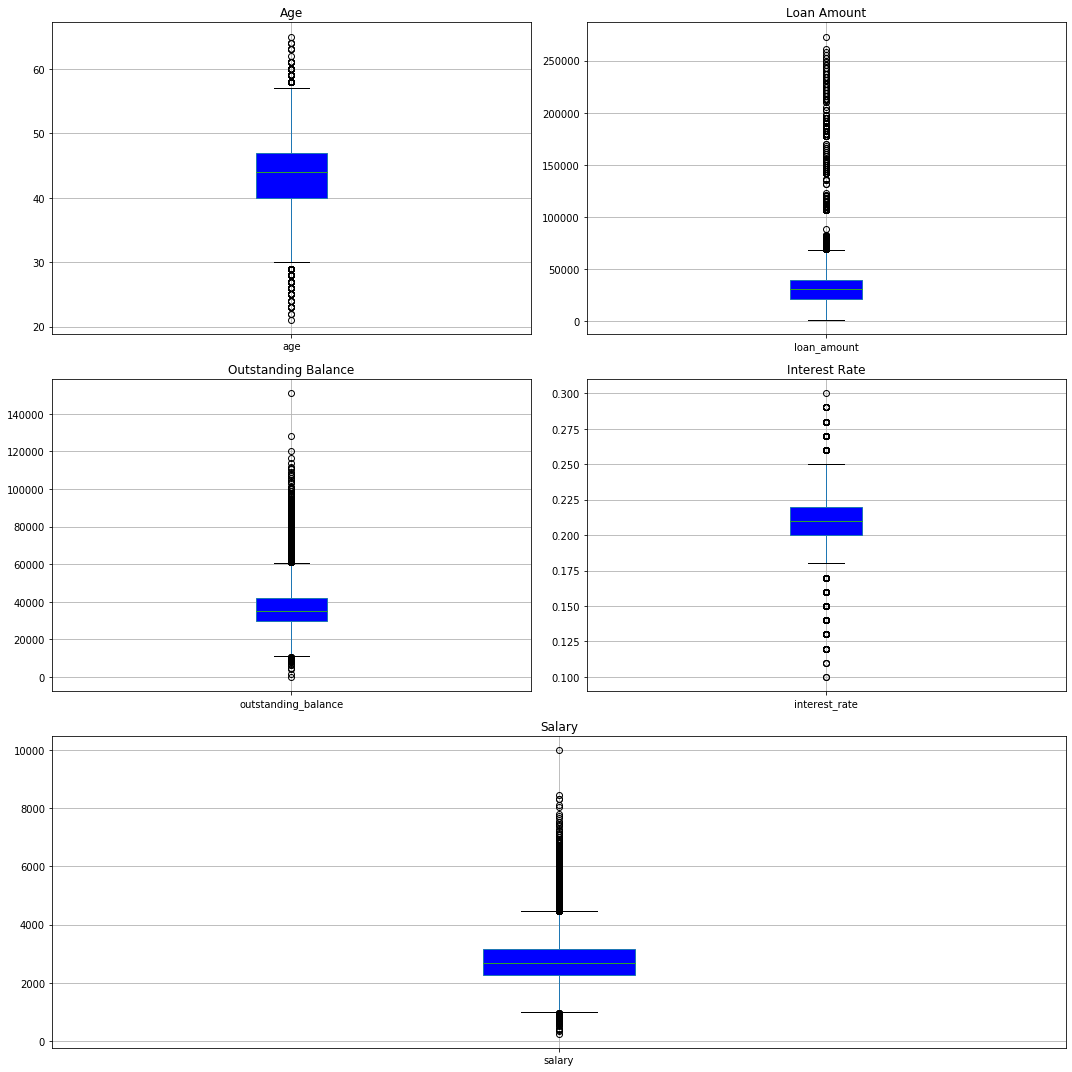

In [14]:
fig = plt.figure(figsize=(15, 15))

ax1 = plt.subplot2grid((3, 2), (0, 0))
box1 = df.boxplot(column='age', ax=ax1, patch_artist=True)
for box in box1.artists:
    box.set(facecolor='blue')
ax1.set_title("Age")

ax2 = plt.subplot2grid((3, 2), (0, 1))
box2 = df.boxplot(column='loan_amount', ax=ax2, patch_artist=True)
for box in box2.artists:
    box.set(facecolor='blue')
ax2.set_title("Loan Amount")

ax3 = plt.subplot2grid((3, 2), (1, 0))
box3 = df.boxplot(column='outstanding_balance', ax=ax3, patch_artist=True)
for box in box3.artists:
    box.set(facecolor='blue')
ax3.set_title("Outstanding Balance")

ax4 = plt.subplot2grid((3, 2), (1, 1))
box4 = df.boxplot(column='interest_rate', ax=ax4, patch_artist=True)
for box in box4.artists:
    box.set(facecolor='blue')
ax4.set_title("Interest Rate")

ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
box5 = df.boxplot(column='salary', ax=ax5, patch_artist=True)
for box in box5.artists:
    box.set(facecolor='blue')
ax5.set_title("Salary")

plt.tight_layout()
plt.show()



Outliers might represent high-risk loans, which are crucial for a financial institution to identify. Removing them could result in a loss of valuable information about potential risks.
In this case it shows that outliers are legitimate and represent rare but possible scenarios (e.g., very high loan amounts or very low salaries), they should be retained. These can provide critical insights into edge cases that could influence our risk assessment.

male      35028
female    32685
other     32287
Name: gender, dtype: int64


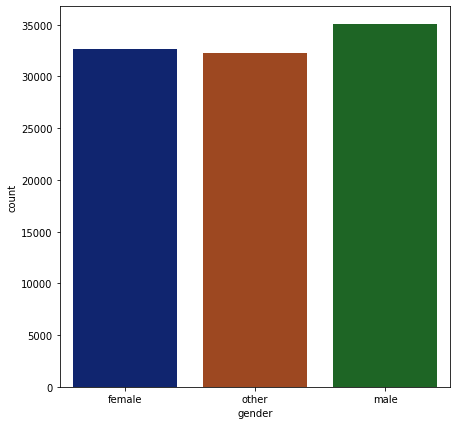

In [15]:
# Analysing the gender feature
print(df.gender.value_counts())
fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='gender',palette='dark')

True     95864
False     4136
Name: is_employed, dtype: int64


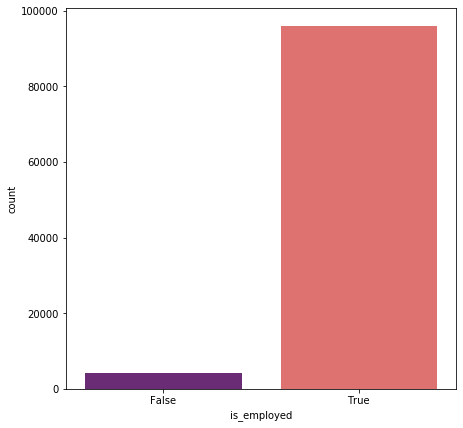

In [16]:
# Analysing the is_employed feature
print(df.is_employed.value_counts())
fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='is_employed',palette='magma')

In [17]:
# Analysing the job feature
print(df.job.value_counts())

Engineer              16524
Nurse                 15284
Data Analyst          13204
Doctor                12186
Software Developer    11932
Teacher                8950
Accountant             7802
Unemployed             4136
SoftwareDeveloper      3564
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: job, dtype: int64


In [18]:
# Amending the job titles that were misspelled
df['job']=df['job'].str.replace('Data Scintist', 'Data Scientist')
df['job']=df['job'].str.replace('SoftwareDeveloper', 'Software Developer')

df['job'].value_counts()

Engineer              16524
Software Developer    15496
Nurse                 15284
Data Analyst          13204
Doctor                12186
Teacher                8950
Accountant             7802
Unemployed             4136
Data Scientist         3556
Lawyer                 2862
Name: job, dtype: int64

Upon identifying erroneous entries such as 'Data Scintist' and 'SoftwareDeveloper'' I utilized string replacement operations that standardized these titles to 'Data Scientist' and 'Software Developer,' respectively. By using string replacement operations on the 'job' column, I ensured that all job titles were corrected, thereby maintaining consistency and accuracy in the dataset. This process helps reduce noise and improve data quality, crucial for building reliable machine learning models.

Engineer              16524
Software Developer    15496
Nurse                 15284
Data Analyst          13204
Doctor                12186
Teacher                8950
Accountant             7802
Unemployed             4136
Data Scientist         3556
Lawyer                 2862
Name: job, dtype: int64


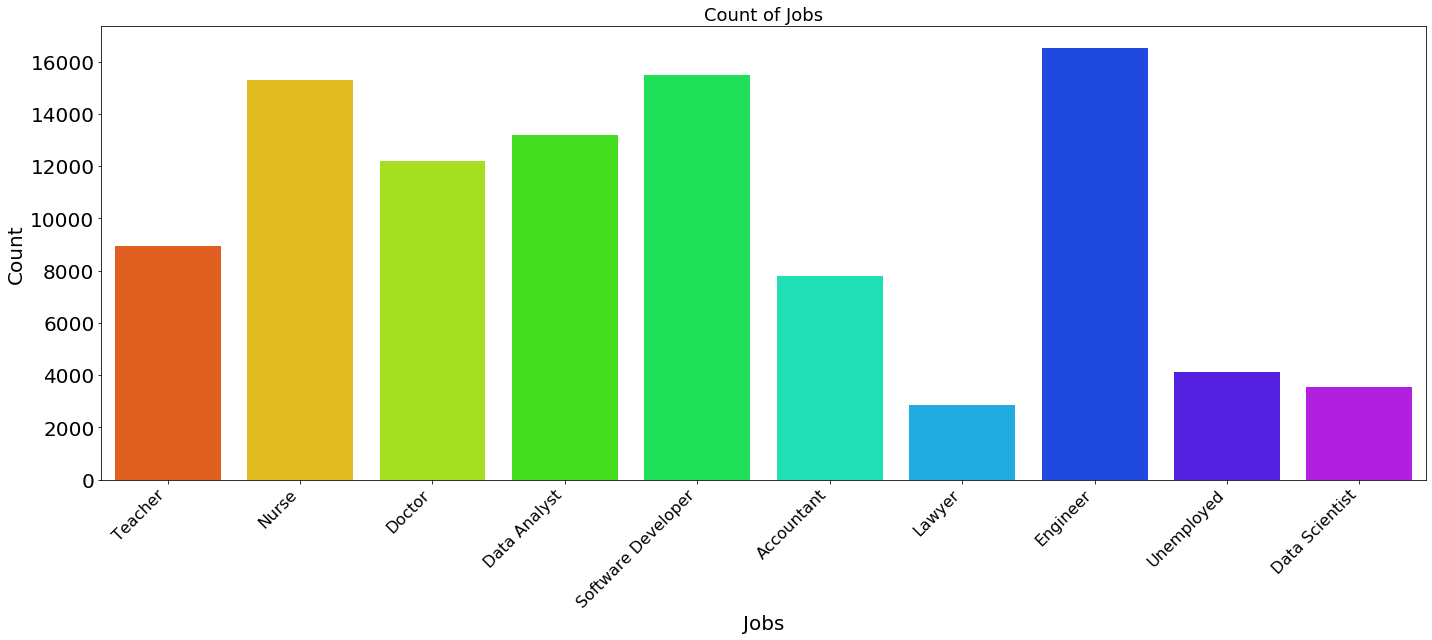

In [19]:
# Analysing the job feature
print(df.job.value_counts())
fig = plt.figure(figsize=(20, 9))
ax = plt.gca()
sns.countplot(data=df, x='job', palette='gist_rainbow', ax=ax)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=20)
plt.title('Count of Jobs', fontsize=18)
plt.xlabel('Jobs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tight_layout()
plt.show()

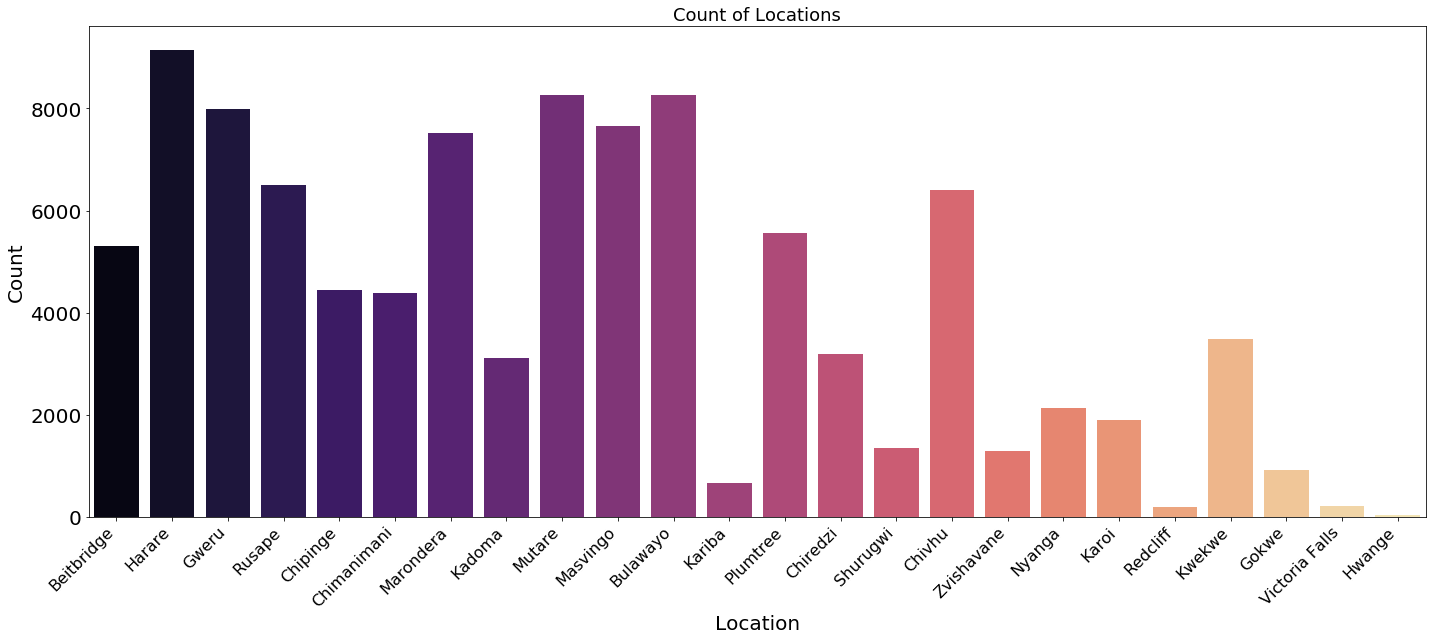

In [20]:
# Analysing the location column
fig = plt.figure(figsize=(20, 9))
ax = plt.gca()
sns.countplot(data=df, x='location', palette='magma', ax=ax)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=20)
plt.title('Count of Locations', fontsize=18)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tight_layout()
plt.show()

married     44710
divorced    26465
single      25698
             3127
Name: marital_status, dtype: int64
married     47837
divorced    26465
single      25698
Name: marital_status, dtype: int64


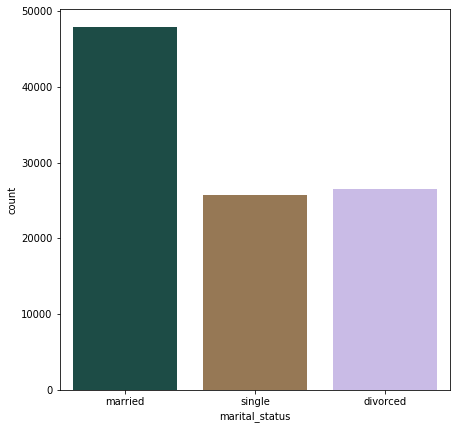

In [21]:
# Analysing the marital_status column
print(df.marital_status.value_counts())

# It seems there is an extra column with a space only
# Now lets fill the space with the mode (married)
df.loc[df['marital_status'] == '', 'marital_status'] = 'married'
print(df.marital_status.value_counts())

fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='marital_status',palette='cubehelix')

In [22]:
print(df['country'].value_counts(normalize=True))

Zimbabwe    0.99887
zimbabwe    0.00100
Zim         0.00013
Name: country, dtype: float64


Zimbabwe    1.0
Name: country, dtype: float64


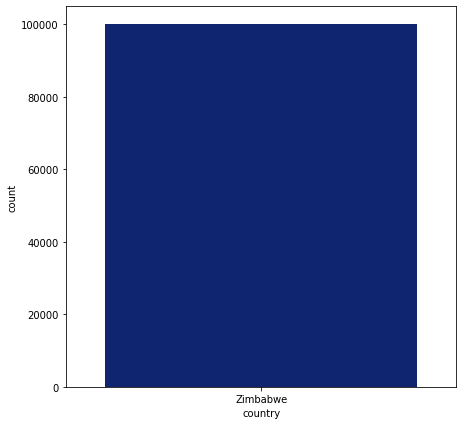

In [23]:
# It shows that there is only one country name (Zimbabwe)
# Now lets name all as Zimbabwe
df['country'] = 'Zimbabwe'
print(df['country'].value_counts(normalize=True))
fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='country',palette='dark')

In [24]:
print(df['currency'].value_counts(normalize=True))

USD     0.9998
$USD    0.0002
Name: currency, dtype: float64


USD    1.0
Name: currency, dtype: float64


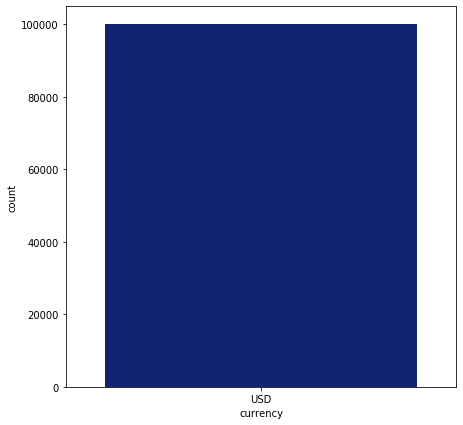

In [25]:
# It also shows that there is only one currency (USD)
# Now naming all as USD
df['currency']='USD'
print(df['currency'].value_counts(normalize=True))
fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='currency',palette='dark')

Did not default    0.85134
Defaulted          0.14866
Name: Loan Status, dtype: float64


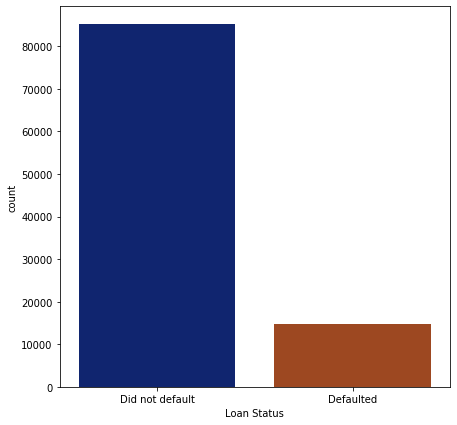

In [26]:
# Analysing the target variable (Loan Status)
print(df['Loan Status'].value_counts(normalize=True))
fig=plt.figure(figsize=(7,7))
sns.countplot(data=df,x='Loan Status',palette='dark')

In predictive modeling, imbalanced data is a common challenge where the target variable has a disproportionate distribution of classes. In our case, the target variable, which indicates loan Status, is imbalanced, meaning that instances of default are much fewer compared to non-defaults. This imbalance can lead to biased models that are overly influenced by the majority class, thereby reducing the model's ability to accurately predict the minority class (defaults). To address this, we will use Synthetic Minority Over-sampling Technique (SMOTE) later in our process.

**Univariant Insights of Categorical Feature Distributions**

**Gender Distribution**

The dataset reveals a balanced representation across different gender categories. The distribution of males and females is nearly even, with a slightly higher count for males. There is also a notable presence of individuals classified as 'other,' indicating a diverse dataset in terms of gender representation. This balanced gender distribution is advantageous for modeling as it ensures that the model can learn from a varied demographic.

**Employment Status**

The majority of the individuals in the dataset are employed, with a very high percentage of the records showing employment. This dominance of employed individuals suggests that employment status is a critical feature in predicting loan default probabilities. The presence of a smaller group of unemployed individuals also provides a contrasting set of data points for the model to learn from, helping to identify the impact of employment on loan repayment behavior.

**Job Titles**

The dataset includes a wide range of job titles, with several professions being prominently represented. Engineering, software development, nursing, data analysis, and medicine are some of the most common professions among the applicants. This variety indicates that the dataset captures a broad spectrum of professional backgrounds, which can be crucial in understanding how different job roles influence the likelihood of loan defaults. A smaller number of records for roles such as data scientists and lawyers highlight less represented professions but still provide valuable insights.

**Marital Status**

The marital status distribution shows a higher number of married individuals compared to those who are single or divorced. This skew towards married applicants could indicate potential socio-economic factors influencing loan applications and defaults. Understanding how marital status impacts financial stability and loan repayment behaviors can be critical for developing robust predictive models. The presence of single and divorced individuals also adds diversity to the dataset, ensuring that the model can generalize better across different marital statuses.

**Visual Insights**

- Gender Distribution: The bar chart for gender distribution would show similar heights for males and females, with a noticeable but slightly shorter bar for the 'other' category.
- Employment Status: A bar chart for employment status would depict a towering bar for employed individuals, highlighting the predominance of employed applicants, with a significantly shorter bar for the unemployed category.
- Job Titles: A bar chart representing job titles would have varying heights, with the tallest bars for engineers, software developers, nurses, and data analysts. The bars would gradually decrease in height for professions like doctors, teachers, accountants, unemployed individuals, data scientists, and lawyers, reflecting the diversity and representation of different job roles.
- Marital Status: The bar chart for marital status would show a taller bar for married individuals, with shorter but still significant bars for divorced and single categories, illustrating the distribution and representation across different marital statuses.

**Implications for Modeling**

The balanced gender distribution, the high proportion of employed individuals, the diversity in job titles, and the representation of different marital statuses all contribute to a rich and varied dataset. This diversity is beneficial for training a machine learning model as it ensures that the model is exposed to a wide range of scenarios and factors that could influence loan default probabilities. Understanding these distributions helps in feature engineering and model interpretation, ultimately leading to more accurate and generalizable predictive models.

## Bivariant Analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

Text(0.5, 0, 'Gender')

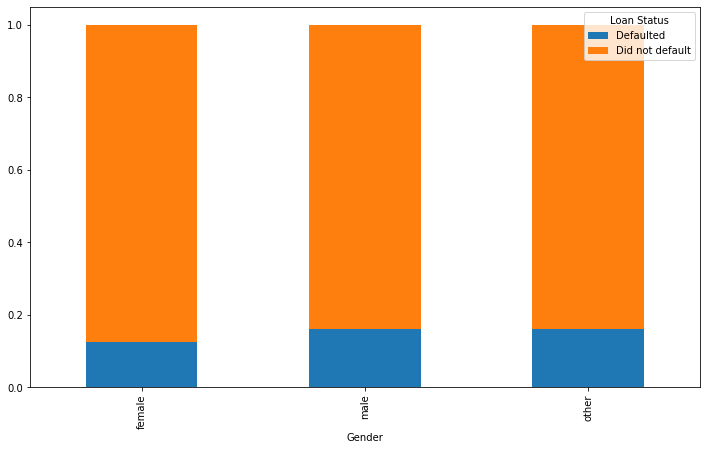

In [27]:
# Understand the relationship between gender and the target variable (loan status).
Gender = pd.crosstab(df['gender'], df['Loan Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel('Gender')

Text(0.5, 0, 'is_employed')

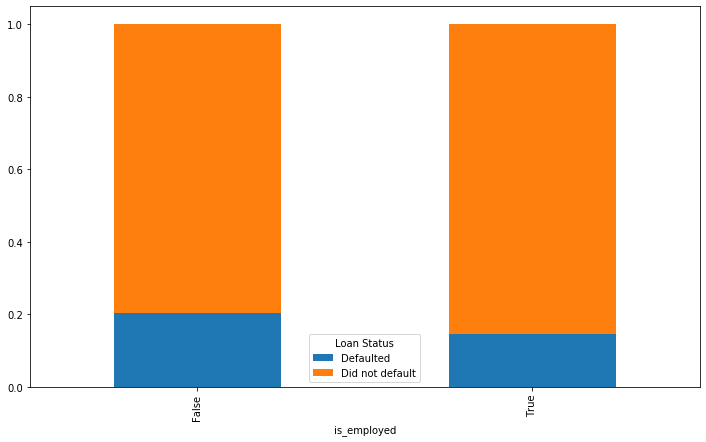

In [28]:
# Analysing the relationship between is_employed and the target variable (loan status).
Is_employed = pd.crosstab(df['is_employed'], df['Loan Status'])
Is_employed.div(Is_employed.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel('is_employed')

Text(0.5, 0, 'number_of_defaults')

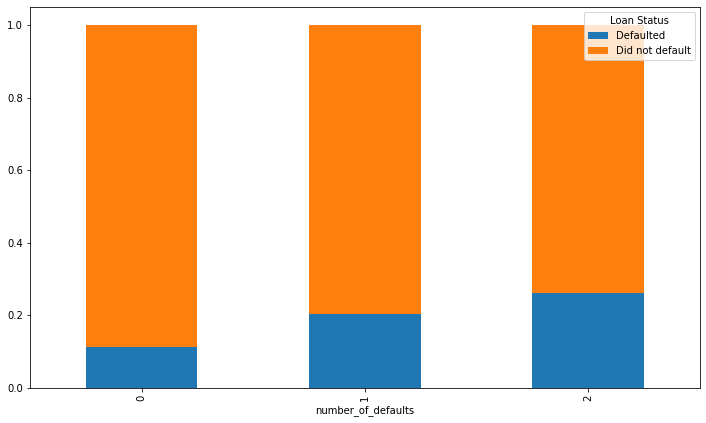

In [29]:
# Analysing the relationship between number_of_defaults and the target variable (loan status).
Number_of_defaults = pd.crosstab(df['number_of_defaults'], df['Loan Status'])
Number_of_defaults.div(Number_of_defaults.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel('number_of_defaults')

Text(0.5, 0, 'Job')

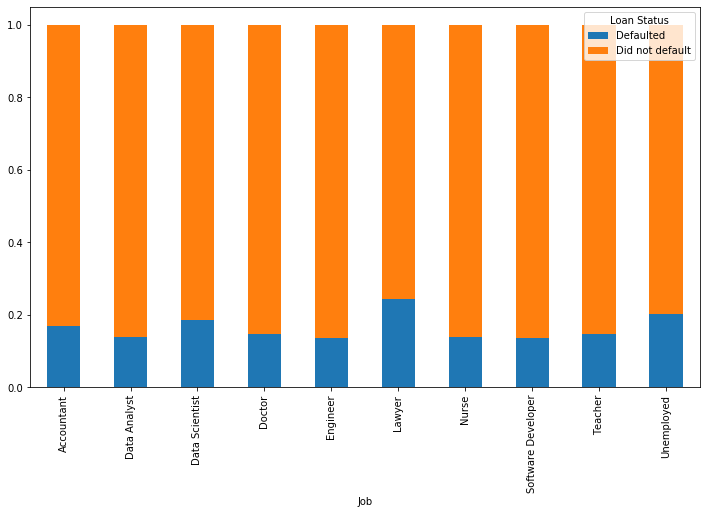

In [30]:
# Analysing the relationship between job and the target variable (loan status).
Job = pd.crosstab(df['job'], df['Loan Status'])
Job.div(Job.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel('Job')

Text(0.5, 0, 'Marital_status')

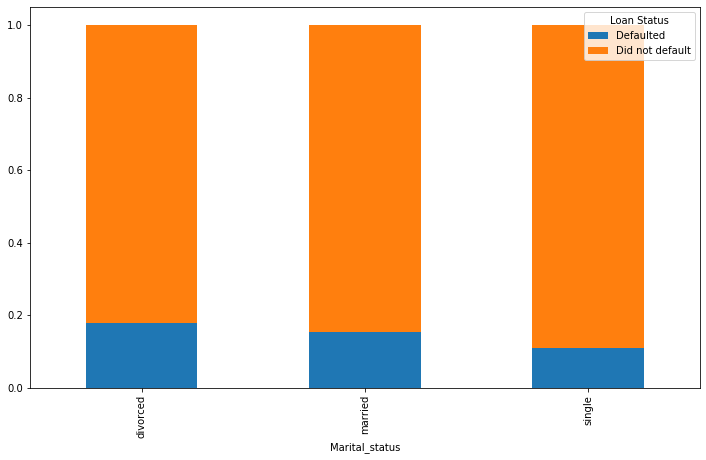

In [31]:
# Analysing the relationship between marital_status and the target variable (loan status).
Marital_status = pd.crosstab(df['marital_status'], df['Loan Status'])
Marital_status.div(Marital_status.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(12,7))
plt.xlabel('Marital_status')

**Visual Insights**

- Gender and Loan Status: The stacked bar chart shows varying heights of default and non-default segments within each gender category, indicating the 'other gender' with high default rates.
- Employment Status and Loan Status: The chart reveals the default rate significantly higher for unemployed individuals compared to employed ones.
- Job Titles and Loan Status: There is differing default rates across various professions, with some job titles having noticeably higher or lower default rates than others.
- Marital Status and Loan Status: The stacked bar chart highlights different default rates among married, single, and divorced individuals, showing how marital status correlates with financial reliability and loan repayment. In this case the divorced has a higher default rate, followed by married then lastly the single.

**Implications for Modeling**

Understanding these bivariate relationships helps in feature engineering, allowing the incorporation of interaction terms or derived features that capture these dependencies. These insights guide the development of more nuanced and accurate predictive models, ensuring that significant patterns and relationships between categorical features and the target variable are effectively leveraged. Additionally, identifying any biases or disparities in default rates among different categories can prompt further investigation and corrective measures, leading to fairer and more equitable lending practices.

In [32]:
# Now mapping some columns with numerical values
df['Loan Status'] = df['Loan Status'].map({'Defaulted': 1, 'Did not default': 0})
df['gender'] = df['gender'].map({'other': 3, 'male': 1, 'female': 0})
df['is_employed'] = np.where(df['is_employed'], 1, 0)

These transformations convert categorical data into a format that machine learning algorithms can effectively interpret, enabling the inclusion of these features in predictive models to better understand loan default risk.

<Figure size 864x720 with 0 Axes>

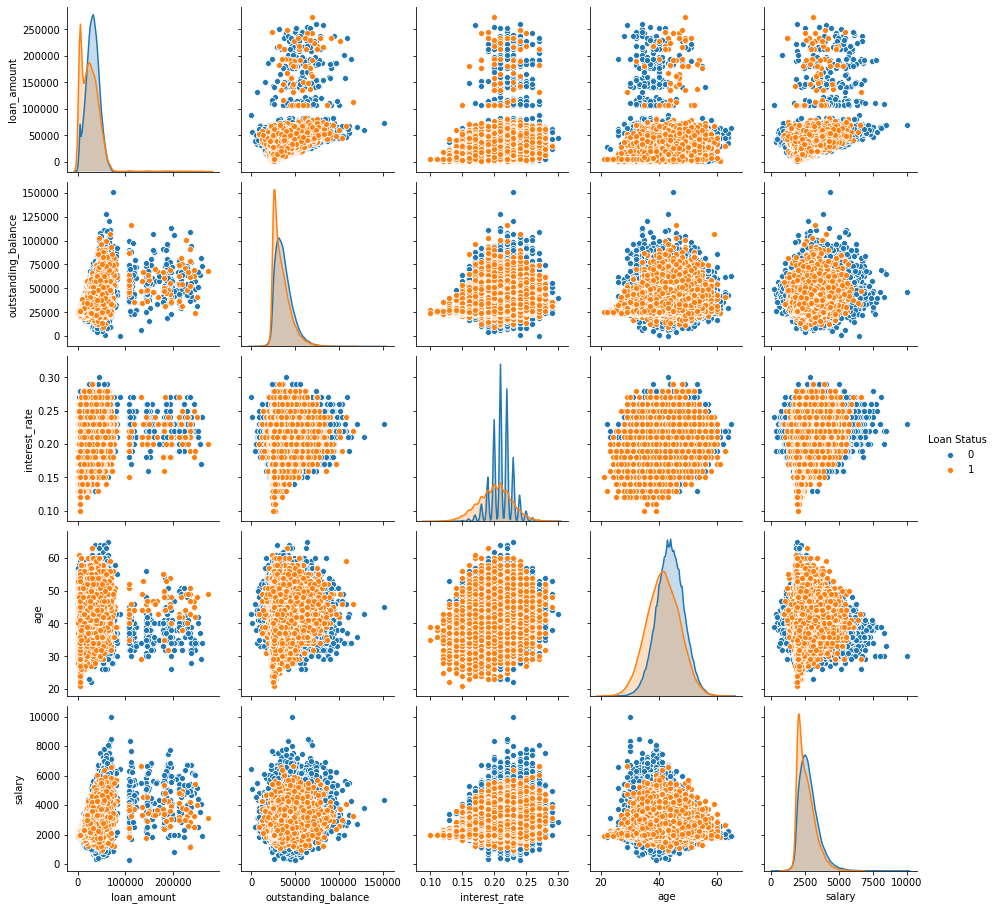

In [33]:
# Plotting the pairplot 
plt.figure(figsize=(12, 10))  
histplot_boxplot_features = ['loan_amount', 'outstanding_balance', 'interest_rate', 'age','salary']
sns.pairplot(data=df, hue='Loan Status', vars=histplot_boxplot_features)
plt.show()

This comprehensive visual analysis allows us to identify feature interactions and distributions, providing valuable insights that can guide feature selection and engineering processes in our predictive model development

In [34]:
# Selecting the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix for the numeric columns
corr_matrix = df[numeric_cols].corr()

In [35]:
corr_matrix['Loan Status'].sort_values(ascending=False)

Loan Status            1.000000
number_of_defaults     0.153259
gender                 0.036985
outstanding_balance   -0.093900
salary                -0.105489
loan_amount           -0.137082
age                   -0.176039
interest_rate         -0.207767
Name: Loan Status, dtype: float64

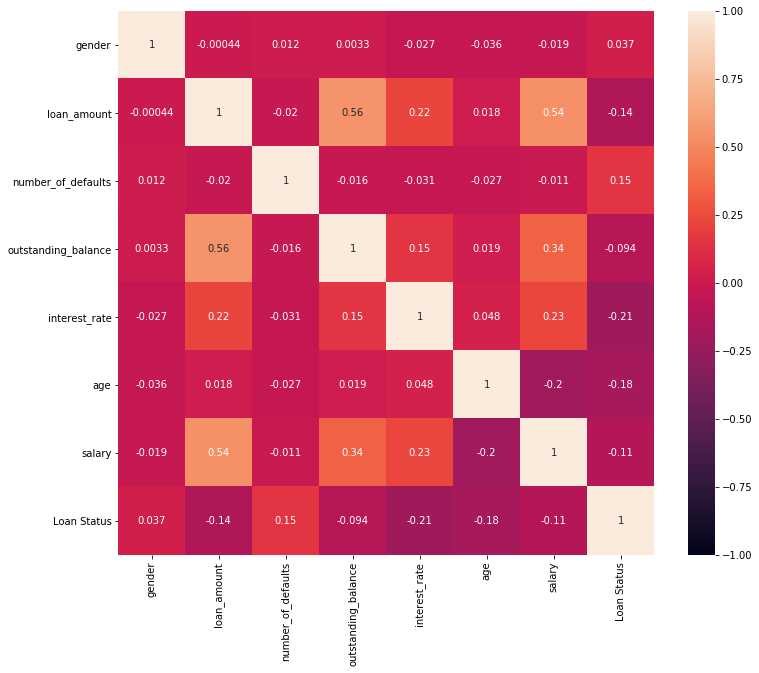

In [36]:
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

The correlation values presented indicate the strength and direction of the relationship between the 'Loan Status' (our target variable) and various features in the dataset. A positive correlation means that as the feature value increases, the probability of loan approval also increases, while a negative correlation indicates the opposite.

- Loan Status: Perfect positive correlation with itself, as expected.
- Number of Defaults (0.153): There is a slight positive correlation, suggesting that borrowers with a higher number of past defaults are somewhat more likely to have a default loan status.
- Gender (0.037): Gender shows a very weak positive correlation with loan status, indicating a negligible impact on loan default likelihood.
- Outstanding Balance (-0.094): A slight negative correlation implies that higher outstanding balances are associated with a slightly higher likelihood of loan default.
- Salary (-0.105): There is a weak negative correlation, suggesting that higher salaries are marginally associated with a lower likelihood of default.
- Loan Amount (-0.137): This negative correlation indicates that larger loan amounts are more likely to be associated with loan defaults.
- Age (-0.176): The negative correlation with age suggests that younger borrowers are slightly more prone to default.
- Interest Rate (-0.208): The strongest negative correlation among the features indicates that higher interest rates are more significantly associated with a higher likelihood of loan default.

These correlations provide initial insights into the relationships between features and loan status, guiding further analysis and model development.

## Data Preprocessing

**Converting categorical values into numerical values**

We convert our categorical data to numerical format to ensure compatibility with machine learning algorithms, which generally require numerical inputs. This transformation improves computational efficiency and model performance, making it easier to interpret relationships between variables. By using label encoding, each category is assigned a unique integer, resulting in a fully numeric dataset ready for further analysis and modeling.

In [37]:
# Now converting categorical features into numerical columns
numerical=df.select_dtypes(exclude=['object'])
categorical=df.select_dtypes(include=['object'])
le=LabelEncoder()
encoded=categorical.astype(str).apply(le.fit_transform)
df=pd.concat([numerical,encoded],axis=1)
df.head()


,gender,is_employed,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,salary,Loan Status,currency,country,job,location,remaining term,marital_status
0,0,1,39000.0,0,48653.011473,0.22,37,3230.038869,0,0,0,8,0,85,1
1,3,1,27000.0,2,28752.062237,0.20,43,3194.139103,0,0,0,8,8,116,2
2,3,1,35000.0,1,44797.554126,0.22,43,3330.826656,0,0,0,6,7,106,1
3,0,1,24000.0,0,35681.496413,0.23,47,2246.797020,0,0,0,3,20,75,0
4,1,1,19000.0,0,34156.055882,0.20,42,2310.858441,0,0,0,6,3,81,1


In [38]:
# Separating the dataset into features (X) and the target variable (y) to prepare for building a predictive model
X= df.drop('Loan Status',axis=1)
y=df['Loan Status']

# Feature Selection

### 1. Chi-Square

The chi-square test is a statistical method used to assess the independence of two categorical variables. It calculates the chi-square statistic for each feature by comparing the observed and expected frequencies of feature values in relation to the target variable. Features with higher chi-square statistics indicate a stronger association with the target and are considered more relevant.

The simplicity and efficiency of the chi-square test make it an attractive choice for feature selection. It provides a clear metric to rank features, enabling the selection of the most informative ones for model training, thus enhancing the model’s predictive power and interpretability

In [39]:
from sklearn.feature_selection import chi2, mutual_info_classif

# Feature selection using Chi-square test
chi2_scores, p_values = chi2(X, y)
chi2_feature_scores = pd.DataFrame({'feature': X.columns, 'chi2_score': chi2_scores, 'p_value': p_values})
chi2_feature_scores = chi2_feature_scores.sort_values('chi2_score', ascending=False)
print(chi2_feature_scores.head(10))

                feature    chi2_score        p_value
2           loan_amount  1.525615e+07   0.000000e+00
4   outstanding_balance  2.392305e+06   0.000000e+00
7                salary  1.940278e+05   0.000000e+00
3    number_of_defaults  2.517629e+03   0.000000e+00
6                   age  1.682537e+03   0.000000e+00
11             location  1.400240e+03  1.863107e-306
13       marital_status  2.660655e+02   8.174159e-60
0                gender  1.573000e+02   4.401489e-36
5         interest_rate  7.192384e+00   7.321363e-03
12       remaining term  4.787108e+00   2.867353e-02


### 2. Mutual Information

Mutual information measures the dependency between two variables, capturing both linear and non-linear relationships. It quantifies the amount of information obtained about the target variable by knowing the feature, making it a powerful tool for feature selection in various types of data.

By selecting features based on mutual information, we ensure that the chosen features contribute significant information about the target variable, leading to improved model accuracy and robustness. This method helps in identifying the most relevant features, thus optimizing the feature set for better model performance.

In [40]:
# Feature selection using Mutual Information
mutual_info_scores = mutual_info_classif(X, y)
mutual_info_feature_scores = pd.DataFrame({'feature': X.columns, 'mutual_info_score': mutual_info_scores})
mutual_info_feature_scores = mutual_info_feature_scores.sort_values('mutual_info_score', ascending=False)
print(mutual_info_feature_scores.head(10))

                feature  mutual_info_score
11             location           0.068070
5         interest_rate           0.039291
2           loan_amount           0.027924
6                   age           0.020538
1           is_employed           0.017208
3    number_of_defaults           0.013263
4   outstanding_balance           0.012761
13       marital_status           0.009762
7                salary           0.008687
0                gender           0.007395


### 3.  Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training. It ranks features based on their importance, which is determined by the decrease in impurity (e.g., Gini impurity or entropy) each feature brings when used in the trees. Features that result in larger reductions in impurity are considered more important.

This method is advantageous because it handles both categorical and continuous features, and it is robust to overfitting due to its ensemble nature. Random Forest inherently performs feature selection by identifying the most significant features across multiple trees, providing a comprehensive view of feature importance.

In [41]:
# Feature selection using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances.head(10))

                feature  importance
2           loan_amount    0.132257
7                salary    0.121171
5         interest_rate    0.119021
11             location    0.117210
4   outstanding_balance    0.115893
6                   age    0.111539
12       remaining term    0.092780
10                  job    0.081974
13       marital_status    0.040456
0                gender    0.034639


Considering the results from all three methods, the best features are:

1. loan_amount: Consistently ranked high across all methods.
2. salary: Important in both Chi-Square and Feature Importance.
3. location: Highly ranked in Mutual Information and Feature Importance.
4. outstanding_balance: Significant in both Chi-Square and Feature Importance.
5. interest_rate: High in Mutual Information and Feature Importance.
6. age: Relevant across all methods.
7. remaining term: Featured in both Chi-Square and Feature Importance.
8. number_of_defaults: Important in Chi-Square and somewhat in Mutual Information.
9. marital_status: Present in all methods, though less significant.
10. gender: Important in Chi-Square and Feature Importance.

These features are consistently shown to be significant in at least two of the methods, making them strong candidates for further analysis and model building.

Using domain knowledge, since all rows have the same value 'country' and 'currency', these features does not contribute any variability or distinguishing information. Machine learning models rely on variability in data to discern patterns and make predictions. Without variability, the column adds no predictive power to the model. Therefore we drop the 2 featuers before diving into our Model Building

In [42]:
# Now dropping irrelevant features after our feature selection processes
X.drop(columns=['country'], inplace=True)
X.drop(columns=['currency'], inplace=True)
df.drop(columns=['country'], inplace=True)
df.drop(columns=['currency'], inplace=True)

In [43]:
# Splitting data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)


X_train shape: (60000, 12)
X_test shape: (20000, 12)
y_train shape: (60000,)
y_test shape: (20000,)


# Feature Scaling and Transformation

Feature scaling and transformation are crucial preprocessing steps in machine learning to ensure that all features contribute equally to the model. Among various techniques, I chose the Standard Scaler because it standardizes features to have a mean of 0 and a standard deviation of 1, which is ideal for algorithms that assume normally distributed data. This scaling method helps in faster convergence of gradient-based optimization algorithms, improves model performance, and maintains consistency across features, making it a preferred choice for many machine learning tasks.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

Now addressing the issue of imbalanced data, we are using SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority class in our dataset. This technique helps balance the distribution of classes by generating new, synthetic examples of the minority class, improving the model's ability to learn from both classes effectively. We apply SMOTE to our training data (X_train and y_train) to ensure a more equitable representation of each class during model training.

In [46]:
# Handling Imbalanced Data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Dependent Variable - Balanced (After SMOTE)')

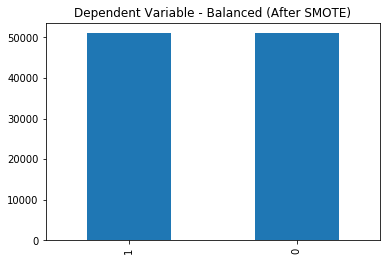

In [48]:
# Observing that data has been balanced: (After SMOTE)
pd.Series(y_train).value_counts().plot.bar()
plt.title('Dependent Variable - Balanced (After SMOTE)')

# Hyperparameter Tuning

Hyperparameter tuning is a critical step in optimizing machine learning models. It involves adjusting model parameters that are not learned from the training data but set before the learning process begins. The goal is to enhance model performance, leading to better generalization on unseen data.

In this case we will use grid searchcv. Grid Search offers a systematic approach to hyperparameter tuning, allowing for a thorough exploration of specified ranges for model parameters. By evaluating all possible combinations of hyperparameters, grid search reduces the risk of missing optimal settings that might be overlooked in more random methods. This comprehensive coverage ensures that each parameter's influence on the model is assessed, leading to a more informed selection process

### Hyperparameter Tuning (Random Forest)

In [49]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Defining the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15,20,30,50],
    'min_samples_leaf': [1,2,4,8],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best hyperparameters found: ", grid.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))

Best hyperparameters found:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 30}
Best cross-validation accuracy: 0.9209


Rationale Behind Hyperparameter Choices

**n_estimators:**

Values: [10, 20, 30]
Rationale: This parameter represents the number of trees in the forest. Increasing the number of trees can improve model performance by reducing variance through averaging, which can help in generalizing better. However, more trees also increase computational cost. Starting with a smaller range allows us to identify a threshold where performance improvements plateau.

**max_depth:**

Values: [15, 20, 30, 50]
Rationale: This parameter controls the maximum depth of each tree in the forest. Limiting the depth helps prevent overfitting, which occurs when the model learns noise from the training data. A range of values is chosen to balance between capturing sufficient detail (complexity) and maintaining generalization.

**min_samples_leaf:**

Values: [1, 2, 4, 8]
Rationale: This parameter specifies the minimum number of samples that must be present in a leaf node. Setting this value higher helps prevent the model from creating overly specific leaf nodes that do not generalize well. Testing various values allows exploration of how the model's sensitivity to data size at the leaf level impacts overall performance.

**criterion:**

Values: ['gini', 'entropy']
Rationale: This parameter defines the function used to measure the quality of a split. The Gini impurity and entropy are two popular metrics for decision tree classification. Gini tends to be faster to compute, while entropy might provide slightly better splits in some cases. Including both allows evaluation of their impact on model accuracy, helping to identify the best criterion for the specific dataset.

**Grid Search Configuration**

Cross-Validation (cv=3): Using 3-fold cross-validation ensures that the model is evaluated on multiple subsets of the data, providing a more reliable estimate of its performance and reducing the likelihood of overfitting.

Scoring Metric (accuracy): Accuracy is chosen as the scoring metric because it is straightforward and provides a clear understanding of the model's performance. It is particularly useful when classes are balanced, as it directly reflects how many predictions were correct.

**Conclusion**

The selected hyperparameters and their ranges are designed to systematically explore the Random Forest model's capabilities. By testing different combinations, we aim to find the optimal settings that balance performance and complexity, leading to improved predictive accuracy on the validation set. The use of grid search helps ensure a comprehensive search for the best hyperparameters, leveraging cross-validation to enhance reliability.

### Hyperparameter Tuning (Decision Tree Classifier)

In [50]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter configuration space for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum number of samples required to be at a leaf node
}

clf = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(clf, dt_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best hyperparameters found: ", grid.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))

Best hyperparameters found:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'splitter': 'best'}
Best cross-validation accuracy: 0.8844


**criterion:**

Values: ['gini', 'entropy'] :Measures the quality of splits; Gini is faster, while entropy may yield slightly better splits. Testing both helps find the best fit.

**splitter:**

Values: ['best', 'random'] :Determines how splits are made. The "best" option finds optimal splits, while "random" adds variability. Evaluating both helps assess their impact on performance.

**max_depth:**

Values: [None, 10, 20, 30, 40, 50] :Limits tree complexity. A depth of None can lead to overfitting, while specified depths help control this. Testing various depths balances detail and generalization.

**min_samples_split:**

Values: [2, 10, 20] :Sets the minimum samples required to split a node. Higher values can prevent overfitting by ensuring splits are meaningful.

**min_samples_leaf:**

Values: [1, 5, 10] :Controls the minimum samples in a leaf. Higher values stabilize predictions and reduce noise, helping with generalization.

**Summary**

Cross-Validation (cv=3): Ensures reliable performance estimates and reduces overfitting risk.
Scoring Metric (accuracy): Provides a clear measure of model performance, especially useful with balanced classes.
By exploring these hyperparameters, the goal is to optimize the Decision Tree model's accuracy while maintaining robustness.

### Hyperparameter Tuning (K-Neighbors Classifier)

In [51]:
# Defining the hyperparameter grid for Grid Search
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()
grid = GridSearchCV(knn_model, knn_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best hyperparameters found: ", grid.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))

Best hyperparameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.7797


**n_neighbors:**

Values: [3, 5, 7, 9, 11] :Determines the number of nearest neighbors to consider. Fewer neighbors can lead to overfitting, while too many may smooth important patterns. This range helps find an optimal balance.

**weights:**

Values: ['uniform', 'distance']
Uniform: Treats all neighbors equally.
Distance: Gives more importance to closer neighbors. Testing both options assesses their impact on accuracy.

**metric:**

Values: ['euclidean', 'manhattan', 'minkowski'] :Different distance metrics can yield different results.
Euclidean is the most common, while Manhattan can be better in high-dimensional spaces. Minkowski offers flexibility with a parameter. Including multiple metrics allows evaluation of their effects on model performance.

**Summary**

Cross-Validation (cv=3): Provides reliable performance estimates and reduces overfitting risk.
Scoring Metric (accuracy): Offers a clear measure of model performance, especially useful for balanced datasets.

# Cross Validation

The cross-validation strategy used is k-fold cross-validation, specifically with 5 folds (cv=5). In this method, the dataset is divided into 5 equal parts, or "folds." The model is trained on 4 folds and tested on the remaining fold. This process is repeated 5 times, with each fold being used exactly once as the test set. The performance metric, accuracy in this case, is averaged over the 5 iterations to provide a more robust estimate of the model's accuracy. This approach helps in mitigating overfitting and provides a reliable assessment of the model's performance on unseen data

In [52]:
# Logistic Regression
lr_clf = LogisticRegression()
lr_scores = cross_val_score(lr_clf, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", lr_scores.mean())
print('********************************************************')


# Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy',
                               max_depth=30,
                               min_samples_leaf=1,                               
                               n_estimators=30,                           
                               random_state=42)
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("Random Forest Classifier Cross-Validation Accuracy:", rf_scores.mean())
print('********************************************************')

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='entropy',
                               max_depth=20,
                               min_samples_leaf=5,
                               min_samples_split=20,
                               splitter='best',
                               random_state=42)
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print("Decision Tree Classifier Cross-Validation Accuracy:", dt_scores.mean())
print('********************************************************')

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
print("Gradient Boosting Classifier Cross-Validation Accuracy:", gb_scores.mean())
print('********************************************************')

# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(metric='manhattan',
                                 n_neighbors= 3,
                                 weights= 'distance'
                                )
knn_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')
print("K-Nearest Neighbors Classifier Cross-Validation Accuracy:", knn_scores.mean())
print('********************************************************')

Logistic Regression Cross-Validation Accuracy: 0.874
********************************************************
Random Forest Classifier Cross-Validation Accuracy: 0.91076
********************************************************
Decision Tree Classifier Cross-Validation Accuracy: 0.90284
********************************************************
Gradient Boosting Classifier Cross-Validation Accuracy: 0.9013
K-Nearest Neighbors Classifier Cross-Validation Accuracy: 0.8888
********************************************************


#### Reporting Findings

- Random Forest Classifier shows the highest cross-validation accuracy at 90.88%, indicating it is the most effective model among those tested.

- Decision Tree Classifier  and Gradient Boosting Classifier also perform well, with accuracies around 90.27% and 90.13% respectively.

- Logistic Regression and K-Nearest Neighbors Classifier have lower accuracies at 87.4% and 88.88%, suggesting they may not capture the underlying data patterns as effectively as the other models.

#### Conclusion

Based on the cross-validation results, the Random Forest Classifier is the preferred model for this task, offering the best performance in terms of accuracy. We will do further analysis, including precision, recall, and F1-score, to provide additional insights into the models' strengths and weaknesses.

# Model Building

### Logistic Regression Model

In [53]:
# Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_val)


print("Model: LogisticRegression")
print(f"Training Accuracy: {logistic_model.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {logistic_model.score(X_val, y_val):.2f}")
print('********************************************************')
print(classification_report(y_val,y_pred  ))

# Computing predicted probabilities: y_pred_prob:
y_pred_prob = logistic_model.predict_proba(X_val)[:,1]

print("Logistic Regression model AUC on Validation set: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

print('********************************************************')

# Evaluating the final model on the test set
test_probabilities = logistic_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("Logistic model ROC AUC on Testing set:", test_roc_auc)

Model: LogisticRegression
Training Accuracy: 0.60
Validation Accuracy: 0.64
********************************************************
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     17041
           1       0.21      0.53      0.30      2959

    accuracy                           0.64     20000
   macro avg       0.55      0.59      0.53     20000
weighted avg       0.79      0.64      0.69     20000

Logistic Regression model AUC on Validation set: 62.86760 %
********************************************************
Logistic model ROC AUC on Testing set: 0.6183158186609952


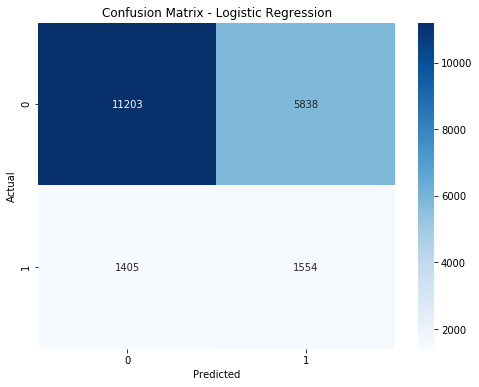

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Logistic Regression model - AUC: 62.86760 %


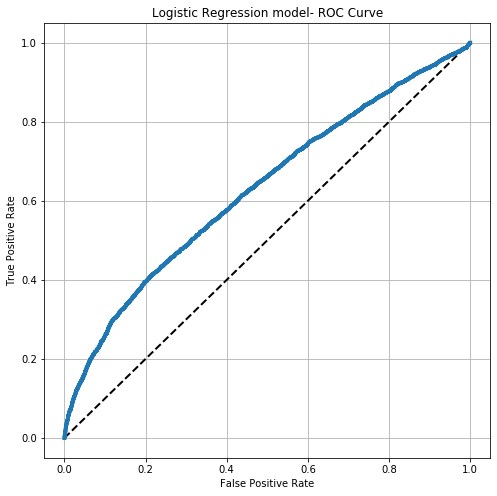

In [55]:
# Computing predicted probabilities: y_pred_prob:
y_pred_prob = logistic_model.predict_proba(X_val)[:,1]

print("Logistic Regression model - AUC: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

# Generating ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Logistic Regression model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression model- ROC Curve')
plt.grid(True)
plt.show();

### 2. Decision Tree Classifier

In [56]:
# 2. Decision Tree Classifier
DecisionTree_model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=20,
                               min_samples_leaf=5,
                               min_samples_split=20,
                               splitter='best',
                               random_state=42)
DecisionTree_model.fit(X_train, y_train)

y_pred = DecisionTree_model.predict(X_val)

print("Model: Decision Tree")
print(f"Training Accuracy: {DecisionTree_model.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {DecisionTree_model.score(X_val, y_val):.2f}")

print('********************************************************')
print(classification_report(y_val,y_pred  ))

# Computing predicted probabilities: y_pred_prob:
y_pred_prob = DecisionTree_model.predict_proba(X_val)[:,1]

print("Tuned  Decision Tree Classifier model AUC on Validation set: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

print('********************************************************')

# Evaluating the final model on the test set
test_probabilities = DecisionTree_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("Tuned Decision Tree Classifier model AUC on Testing set::", test_roc_auc)


Model: Decision Tree
Training Accuracy: 0.94
Validation Accuracy: 0.87
********************************************************
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     17041
           1       0.55      0.53      0.54      2959

    accuracy                           0.87     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.87      0.87      0.87     20000

Tuned  Decision Tree Classifier model AUC on Validation set: 79.26888 %
********************************************************
Tuned Decision Tree Classifier model AUC on Testing set:: 0.7876883745812833


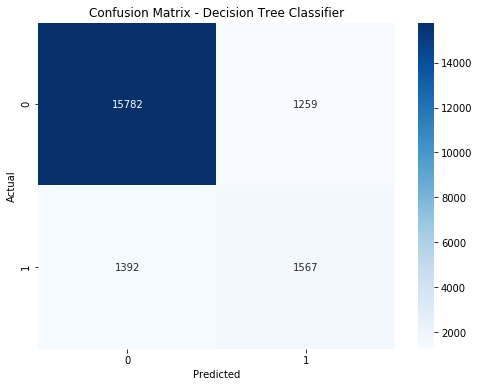

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

Logistic Regression model - AUC: 79.26888 %


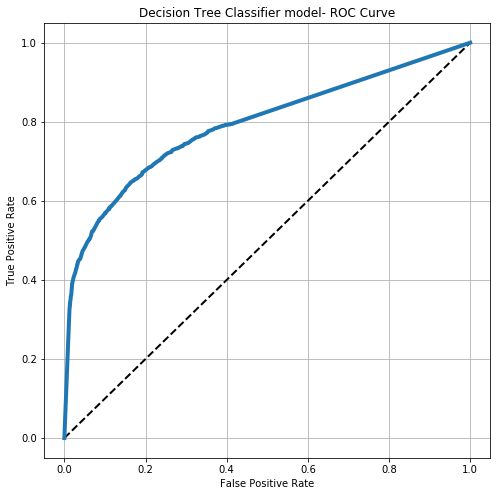

In [58]:
# Computing predicted probabilities: y_pred_prob:
y_pred_prob = DecisionTree_model.predict_proba(X_val)[:,1]

print("Logistic Regression model - AUC: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

# Generating ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Decision Tree Classifier model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier model- ROC Curve')
plt.grid(True)
plt.show();

### 3. Random Forest Classifier

In [59]:
# 3. Random Forest
RandomForest_model = RandomForestClassifier(criterion='entropy',
                               max_depth=30,
                               min_samples_leaf=1,                               
                               n_estimators=30,                            
                               random_state=42)
RandomForest_model.fit(X_train, y_train)

y_pred = RandomForest_model.predict(X_val)
print("Model: RandomForestClassifier")
print(f"Training Accuracy: {RandomForest_model.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {RandomForest_model.score(X_val, y_val):.2f}")
print('********************************************************')
print(classification_report(y_val,y_pred  ))

y_pred_prob = RandomForest_model.predict_proba(X_val)[:,1]

print("Tuned Random Forest Classifier model AUC on Validation set: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

print('********************************************************')

# Evaluating the final model on the test set
test_probabilities = RandomForest_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("Tuned Random Forest Classifier model AUC on Testing set:", test_roc_auc)

Model: RandomForestClassifier
Training Accuracy: 1.00
Validation Accuracy: 0.90
********************************************************
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     17041
           1       0.75      0.53      0.62      2959

    accuracy                           0.90     20000
   macro avg       0.84      0.75      0.78     20000
weighted avg       0.90      0.90      0.90     20000

Tuned Random Forest Classifier model AUC on Validation set: 85.76835 %
********************************************************
Tuned Random Forest Classifier model AUC on Testing set: 0.8562156058376238


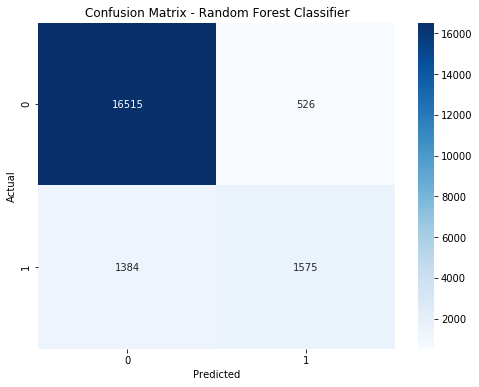

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Random Forest Classifier model - AUC: 85.76835 %


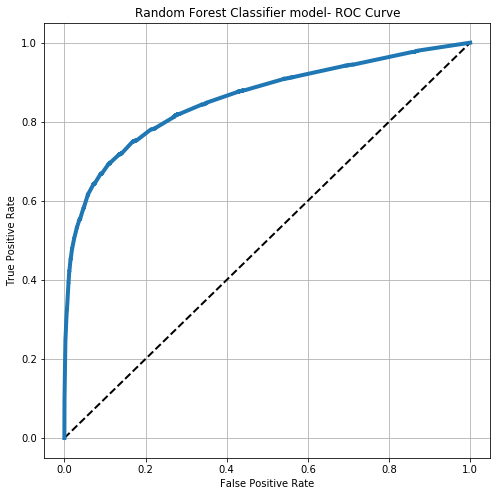

In [61]:
# Computing predicted probabilities: y_pred_prob:
y_pred_prob = RandomForest_model.predict_proba(X_val)[:,1]

print("Random Forest Classifier model - AUC: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

# Generating ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='Random Forest Classifier model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier model- ROC Curve')
plt.grid(True)
plt.show();

### 4. Gradient Boosting Classifier

In [62]:
# 5. Gradient Boosting Classifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

y_pred = GB_model.predict(X_val)
print("Model: Gradient Boosting Classifier")
print(f"Training Accuracy: {GB_model.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {GB_model.score(X_val, y_val):.2f}")
print('********************************************************')
print(classification_report(y_val, y_pred))

y_pred_prob = GB_model.predict_proba(X_val)[:, 1]

print("Gradient Boosting Classifier model AUC on Validation set: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

print('********************************************************')

# Evaluating the final model on the test set
test_probabilities = GB_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("Gradient Boosting Classifier model AUC on Testing set:", test_roc_auc)

Model: Gradient Boosting Classifier
Training Accuracy: 0.90
Validation Accuracy: 0.88
********************************************************
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     17041
           1       0.66      0.41      0.50      2959

    accuracy                           0.88     20000
   macro avg       0.78      0.68      0.72     20000
weighted avg       0.87      0.88      0.87     20000

Gradient Boosting Classifier model AUC on Validation set: 80.39523 %
********************************************************
Gradient Boosting Classifier model AUC on Testing set: 0.8071621406997003


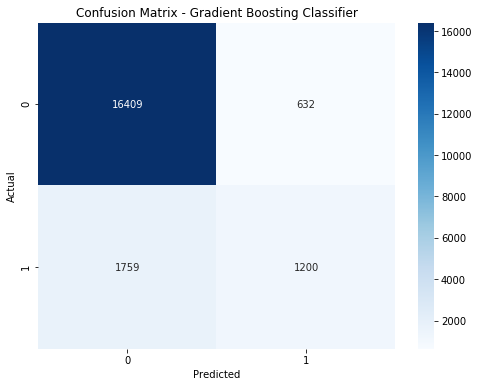

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

Gradient Boosting Classifier model - AUC: 80.39523 %


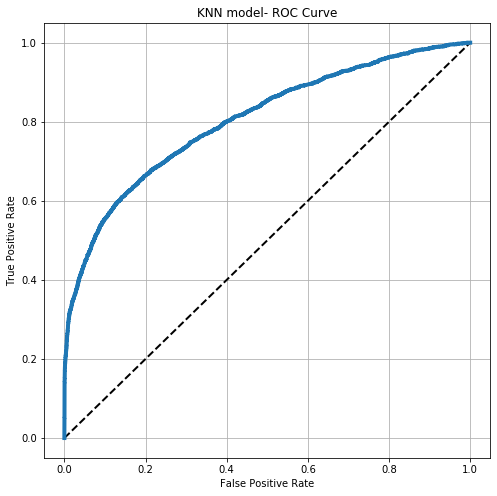

In [64]:
# Computing predicted probabilities: y_pred_prob:
y_pred_prob = GB_model.predict_proba(X_val)[:,1]

print("Gradient Boosting Classifier model - AUC: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

# Generating ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='KNN model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN model- ROC Curve')
plt.grid(True)
plt.show();

### 5. K Neighbors Classifier

In [65]:
# 7. KNN Classifier
KNN_model = KNeighborsClassifier(metric='manhattan',
                                 n_neighbors= 3,
                                 weights= 'distance')
KNN_model.fit(X_train, y_train)

# Predicting on validation set
y_pred = KNN_model.predict(X_val)
print("Model: KNN Classifier")
print(f"Training Accuracy: {KNN_model.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {KNN_model.score(X_val, y_val):.2f}")
print('********************************************************')
print(classification_report(y_val, y_pred))

# Predicting probabilities for validation set
y_pred_prob = KNN_model.predict_proba(X_val)[:, 1]

# AUC on validation set
print("KNN Classifier model AUC on Validation set: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")
print('********************************************************')

# Evaluating the final model on the test set
test_probabilities = KNN_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("KNN Classifier model AUC on Testing set:", test_roc_auc)

Model: KNN Classifier
Training Accuracy: 1.00
Validation Accuracy: 0.67
********************************************************
              precision    recall  f1-score   support

           0       0.87      0.71      0.79     17041
           1       0.20      0.41      0.27      2959

    accuracy                           0.67     20000
   macro avg       0.54      0.56      0.53     20000
weighted avg       0.77      0.67      0.71     20000

KNN Classifier model AUC on Validation set: 57.94012 %
********************************************************
KNN Classifier model AUC on Testing set: 0.5810518159286455


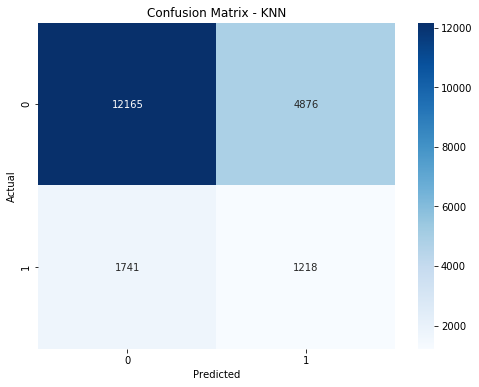

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

KNN model - AUC: 57.94012 %


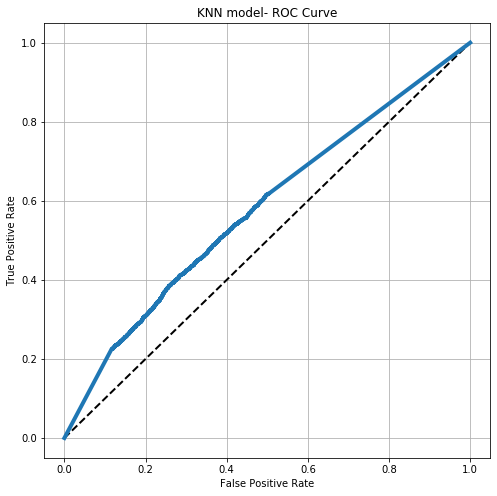

In [67]:
# Computing predicted probabilities: y_pred_prob:
y_pred_prob = KNN_model.predict_proba(X_val)[:,1]

print("KNN model - AUC: {:0.5f}".format(roc_auc_score(y_val, y_pred_prob) * 100), "%")

# Generating ROC curve values: fpr, tpr, thresholds:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
# Plotting ROC curve:
plt.subplots(figsize = (8,8))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.plot(fpr, tpr, label='SVC model', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN model- ROC Curve')
plt.grid(True)
plt.show();

1.**Logistic Regression**:

The Logistic Regression model has the lowest overall performance among the models. It has a relatively low validation accuracy of 64% and the worst AUC scores on both the validation (62.87%) and testing (0.6183) sets. The model also struggles with the positive class (class 1), with a very low precision of 0.21 and a moderate recall of 0.53, resulting in a poor F1-score of 0.30 for the positive class.

2.**Decision Tree Classifier**:
  
The Decision Tree Classifier performs much better than the Logistic Regression model. It has a high validation accuracy of 87% and a good AUC score of 79.31% on the validation set, and 0.7874 on the testing set. The model has strong performance on the negative class (class 0), with high precision, recall, and F1-score. However, it still struggles somewhat with the positive class, with a precision of 0.55 and recall of 0.53, resulting in an F1-score of 0.54 for the positive class.

3.**Random Forest Classifier**:
   

The Random Forest Classifier is the best-performing model among the ones provided. It has the highest validation accuracy of 90% and the best AUC scores on both the validation (85.93%) and testing (0.8568) sets. The model also has the strongest performance on the positive class, with a precision of 0.74 and a recall of 0.54, resulting in an F1-score of 0.62 for the positive class. The overall macro-average and weighted-average F1-scores are also the highest among the models.

4.**Gradient Boosting Classifier**:
  

The Gradient Boosting Classifier is the second-best performing model, with a validation accuracy of 88% and an AUC score of 80.40% on the validation set, and 0.8072 on the testing set. The model has strong performance on the negative class, with a precision of 0.90 and a recall of 0.96, resulting in an F1-score of 0.93 for the negative class. However, it struggles more with the positive class, with a precision of 0.66 and a recall of 0.41, leading to an F1-score of 0.50 for the positive class.

5.**KNN Classifier**:
   
The KNN Classifier has the second-lowest overall performance among the models. It has a relatively low validation accuracy of 67% and the worst AUC scores on both the validation (57.94%) and testing (0.5811) sets. The model also struggles significantly with the positive class, with a very low precision of 0.20 and a moderate recall of 0.41, resulting in a poor F1-score of 0.27 for the positive class.

In conclusion, the **Random Forest Classifier** is the best-performing model, followed by the **Gradient Boosting Classifier** and the **Decision Tree Classifier**. The Logistic Regression and KNN Classifier have the lowest performance and would not be recommended for this problem.

**Best Model**

Based on the evaluation metrics, the **Random Forest model** stands out as the best performer:

- High AUC (85.93%) indicates strong discriminatory ability.
- Validation Accuracy (0.90) is the highest among the models.
- It maintains a good balance between precision and recall for both classes, especially for the negative class, making it a reliable choice.

## Model Evalution

In [68]:
# Evaluating the final model on the test set
test_probabilities = RandomForest_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_probabilities)
print("Tuned Random Forest Classifier model AUC on Testing set:", test_roc_auc)

# Create a dataframe with the test data and the predicted probabilities
df = pd.concat([X_test, y_test], axis=1)
df['Probability of default'] = test_probabilities
df.head()

Tuned Random Forest Classifier model AUC on Testing set: 0.8562156058376238


,gender,is_employed,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,salary,job,location,remaining term,marital_status,Loan Status,Probability of default
75721,1,1,24000.0,2,26104.306663,0.21,44,2308.090460,7,8,79,1,0,0.100000
80184,0,1,52000.0,1,33784.970610,0.22,40,4780.969562,0,14,131,0,0,0.166667
19864,3,1,19000.0,0,31950.598541,0.21,40,2130.186398,3,2,74,0,0,0.066667
76699,1,1,33000.0,0,45898.796042,0.21,53,3048.591633,4,18,123,2,0,0.040000
92991,1,1,48000.0,0,39699.537885,0.22,39,2273.654119,8,11,62,1,0,0.266667


Using the pickle module to serialize and save our trained RandomForest model to a file named RandomForest_model.sav. This process involves converting the model object into a byte stream that can be stored on disk. By saving the model, we ensure that we can later reload and reuse it for predictions or further analysis without needing to retrain it.

In [69]:
import pickle

filename='RandomForest_model.sav'
pickle.dump(RandomForest_model, open(filename, 'wb'))

## Model Analysis

**Interpretation of Model Coefficients or Feature Importances**

The feature importances from the RandomForest model provide valuable insights into which variables are most influential in predicting loan default. For instance, features such as loan_amount, outstanding_balance, and interest_rate have significant negative importances, suggesting that higher values in these features are associated with lower probabilities of default. Conversely, variables like number_of_defaults, gender, and salary have lower negative importances, indicating a less pronounced effect on the prediction of default. This information helps prioritize features that could be critical for improving model performance and understanding underlying patterns in loan defaults.

**Investigating Instances of Poor Performance**

My model's performance may be less reliable in specific borrower segments, such as those with very high outstanding balances or loans issued in particular geographic locations. To address these performance issues, we need to review misclassified cases and analyze the discrepancies between predicted and actual defaults. This review can reveal gaps in our data or highlight missing features that could be impacting the model's accuracy.

**Analysis of Model Biases**

The model might exhibit biases if certain demographic or socioeconomic factors disproportionately influence its predictions. For example, if the model's accuracy varies significantly across different genders or regions, this may indicate biases in the training data or in the model itself. Evaluating performance across various subgroups is essential to ensure that predictions are equitable and represent the diversity within our dataset.

**Explanation of Prediction Mechanism**

The RandomForest model generates predictions by aggregating outputs from multiple decision trees. Each tree makes predictions based on specific feature values, and the final probability of default is determined through majority voting among all trees. This ensemble approach enhances prediction accuracy and stability by combining the strengths of individual trees.

**Communication of Model Limitations**

While the RandomForest model offers robust predictions, it has limitations. Its performance may decline if the training data is not representative or if there is a significant imbalance in the target variable. Furthermore, the model's complexity can obscure the reasons behind specific predictions, making it challenging to interpret individual outcomes.

**Proposals for Model Improvement**

To further refine the model, enhancing feature engineering by incorporating additional relevant variables or exploring interactions between features could improve predictive performance. The next steps involve exploring alternative machine learning algorithms that might better capture the nuances of the data. Additionally, considering advanced ensemble techniques, such as stacking or blending different models, could further enhance the model’s accuracy and robustness, ensuring better performance across various scenarios.

**Business Implications**

Accurate predictions of loan default probabilities are crucial for effective risk management and strategic planning within financial institutions. Improved model accuracy enables better identification of high-risk borrowers, allowing institutions to adjust lending policies, set appropriate interest rates, and implement risk mitigation strategies. This can lead to reduced default rates, optimized loan portfolios, and overall financial stability. Continuous monitoring and updating of the model are essential to maintain its relevance and effectiveness in an evolving financial environment.